<a href="https://colab.research.google.com/github/jasoberon/Puerto_Serial/blob/master/LectorSensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install serial

     |████████████████████████████████| 40 kB 3.3 MB/s 
     |████████████████████████████████| 829 kB 8.7 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=0d7caaf417b1cd95b4fbe615f4be25042fe4c4ea11b74594b3696c7dd6e32c00
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


Cannot conect to the port


NameError: ignored

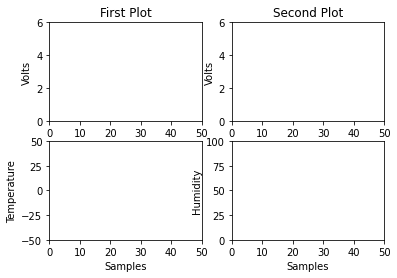

In [2]:
import serial
import time
import collections
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D
import numpy as np


def getSerialData(self,Samples,numData,serialConnection, lines):
    for i in range(numData):
        value  = float(serialConnection.readline().strip())  #Leer sensor / Read sensor
        data[i].append(value) #Guarda lectura en la última posición / #Save reading in the end position
        lines[i].set_data(range(Samples),data[i]) # Dibujar nueva linea / Drawn new line

        
serialPort = 'COM19' # Puerto serial arduino / Arduino serial port
baudRate = 9600  # Baudios

try:
  serialConnection = serial.Serial(serialPort, baudRate) # Instanciar objeto Serial / Instance Serial Object
except:
  print('Cannot conect to the port')

Samples = 50  #Muestras / Samples
sampleTime = 150  #Tiempo de muestreo / Sample Time
numData = 4


# Limites de los ejes / Axis limit
xmin = 0
xmax = Samples
ymin = [0, 0 , -50 ,0]
ymax = [6, 6 , 50 , 100]
lines = []
data = []

for i in range(numData):
    data.append(collections.deque([0] * Samples, maxlen=Samples))
    lines.append(Line2D([], [], color='blue'))
  
fig = plt.figure()# Crea una nueva figura #Create a new figure.
ax1 = fig.add_subplot(2, 2, 1,xlim=(xmin, xmax), ylim=(ymin[0] , ymax[0]))
ax1.title.set_text('First Plot')
ax1.set_xlabel("Samples")
ax1.set_ylabel("Volts")
ax1.add_line(lines[0])

ax2 = fig.add_subplot(2, 2, 2,xlim=(xmin, xmax), ylim=(ymin[1] , ymax[1]))
ax2.title.set_text('Second Plot')
ax2.set_xlabel("Samples")
ax2.set_ylabel("Volts")
ax2.add_line(lines[1])

ax3 = fig.add_subplot(2, 2, 3,xlim=(xmin, xmax), ylim=(ymin[2] , ymax[2]))
#ax3.title.set_text('Third Plot')
ax3.set_xlabel("Samples")
ax3.set_ylabel("Temperature")
ax3.add_line(lines[2])

ax4 = fig.add_subplot(2, 2, 4,xlim=(xmin, xmax), ylim=(ymin[3] , ymax[3]))
#ax4.title.set_text('Fourth Plot')
ax4.set_xlabel("Samples")
ax4.set_ylabel("Humidity")
ax4.add_line(lines[3])


    
anim = animation.FuncAnimation(fig,getSerialData, fargs=(Samples,numData,serialConnection,lines), interval=sampleTime)
plt.show()

serialConnection.close() # cerrar puerto serial/ close serial port